In [1]:
# Libs Necesárias:

# Libs para montagem de matrizes.
import pandas as pd
import numpy as np

# libs para análises graficas.
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns

# libs para ignorar avisos.
import warnings


In [2]:
# Lendo os dados
dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# Verificando os dados
dados.head(10)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48


In [3]:
# Lendo a dimensão dos dados:
dados.shape

(1034, 9)

In [4]:
# Verificar campos nulos
dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

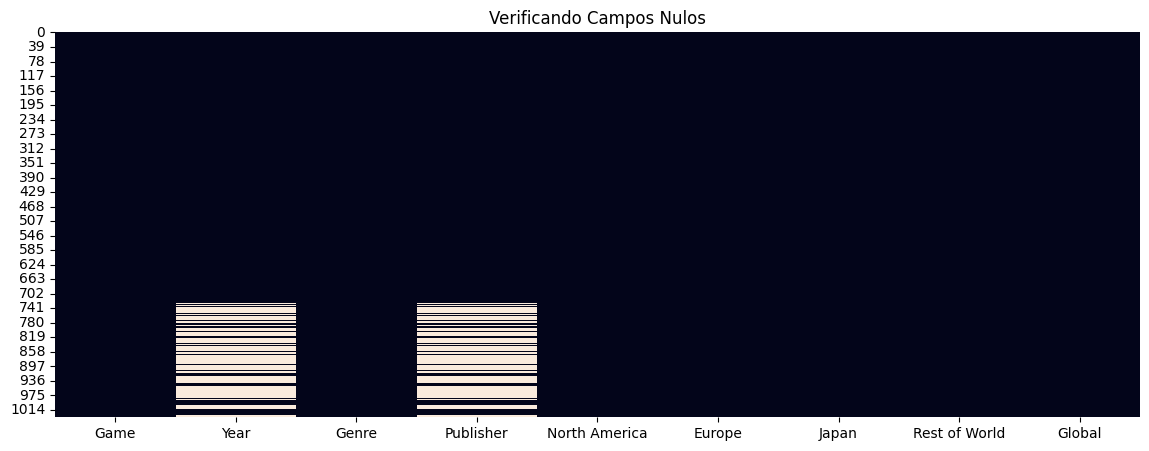

In [5]:
# Verificar campos nulos com grafico:
plt.figure(figsize=(14, 5))
sns.heatmap(dados.isnull(), cbar=False)
plt.title('Verificando Campos Nulos');


In [6]:
# excluindo valores nulos:
dados.dropna()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1025,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [7]:
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


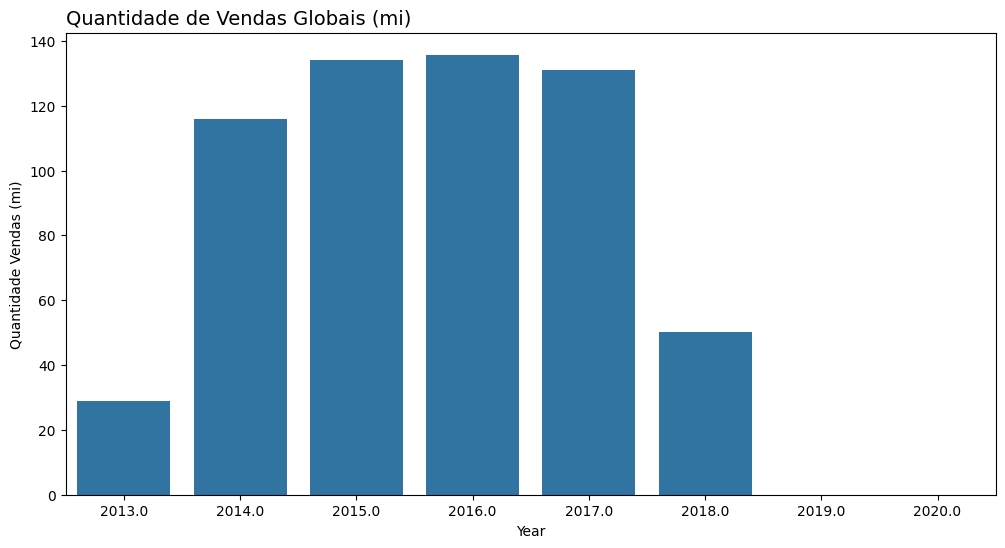

In [8]:
plt.figure(figsize=(12, 6));        # Define o tamanho da figura como 12 polegadas de largura e 6 polegadas de altura.
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14);         # Define o título da figura como "Quantidade de Vendas Globais (mi)" e o posiciona à esquerda com tamanho de fonte 14.

# Cria um gráfico de barras usando a biblioteca `seaborn` com os dados do DataFrame `dados`.
# A variável 'Year' é usada como eixo x e a variável 'Global' como eixo y.
# A opção `errorbar` é definida como `None` para desativar barras de erro.
# A função `sum` é usada como estimador para calcular a soma dos valores para cada ano.
sns.barplot(data=dados, x='Year', y='Global', errorbar=None, estimator=sum)

plt.ylabel('Quantidade Vendas (mi)');# Define o rótulo do eixo y como "Quantidade Vendas (mi)". 

In [9]:
# Excluindo anos que estão sem dados
base_dados = dados.loc[(dados['Year']!=2019) & (dados['Year']!=2020)]
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


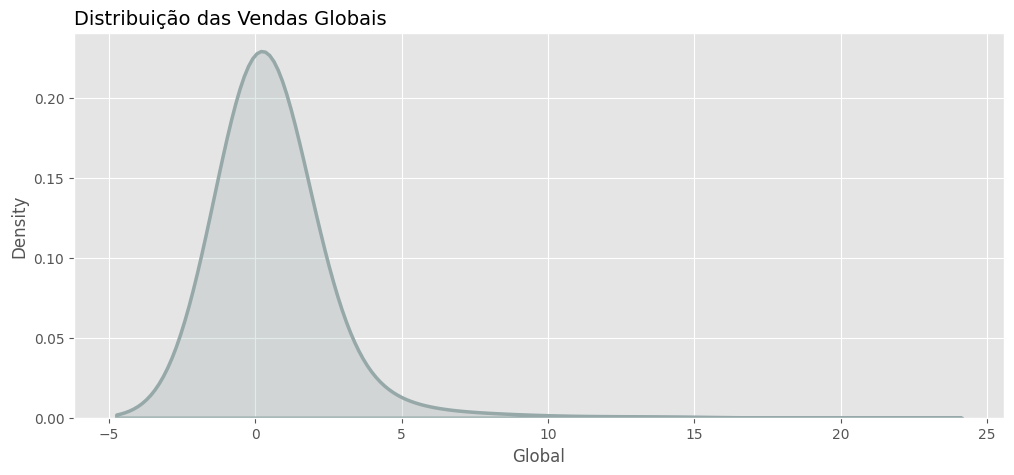

In [10]:
# Tamanho
plt.figure(figsize=(12, 5))

# Estilo
plt.style.use('ggplot')

# Titulo
plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14);

sns.kdeplot(dados['Global'], fill=True, bw_method=1, color='#96a8a8', linewidth=2.5);

In [11]:
# Agrupa o DataFrame 'base_dados' por ano e calcula a soma dos valores de todas as colunas numéricas para cada ano.
base_dados.groupby(by=['Year']).sum()

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


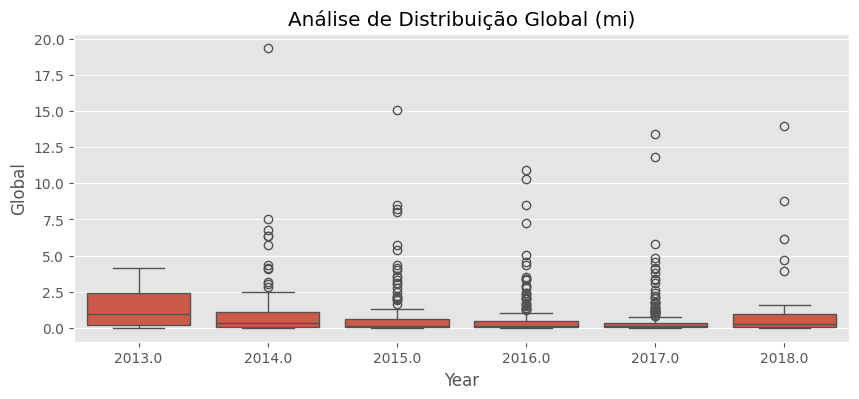

In [12]:
plt.figure(figsize=(10, 4))    # Define o tamanho da figura do gráfico como 10 unidades de largura e 4 unidades de altura.
plt.title('Análise de Distribuição Global (mi)')    # Define o título do gráfico como "Análise de Distribuição Global (mi)".
sns.boxplot(data=base_dados, x='Year', y='Global');   # Esta linha cria um boxplot a partir do conjunto de dados base_dados.
# O boxplot é desenhado com o eixo x representando o ano (Year) e o eixo y representando a variável global (Global).

In [13]:
base_dados.loc[base_dados['Global']>=10]   # Este código seleciona linhas da tabela base_dados onde o valor na coluna Global é maior ou igual a 10.

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [14]:
base_dados.head(6)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94


In [15]:
Analise = base_dados.groupby( by=['Year'] ).sum().reset_index()

# analisando a proporção dos 100% de cada continemente comparado ao Total
America = [ America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

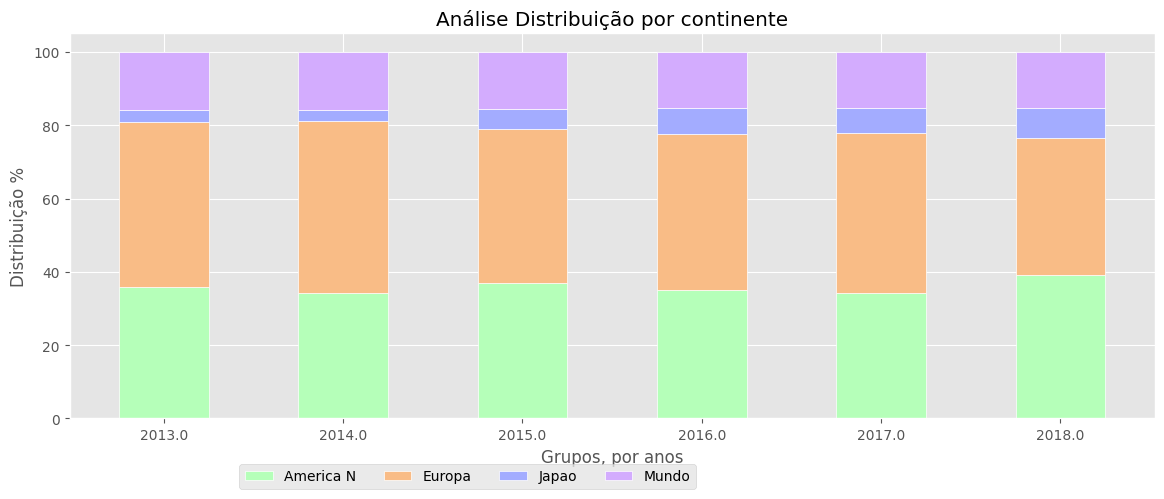

In [16]:
# Criando grafico de barras empilhados :
# Definindo tamanho do grafico:
plt.figure(figsize=(14, 5))
# Largura
largura_barra = 0.5

Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

plt.title('Análise Distribuição por continente')

plt.bar(Grupos, America, width=largura_barra, color='#b5ffb9', edgecolor='white')

plt.bar(Grupos, Europa, bottom=America, width=largura_barra, color='#f9bc86', edgecolor='white')

plt.bar(Grupos, Japao, bottom=[A + B for A, B in zip(America, Europa)], width=largura_barra, color='#a3acff', edgecolor='white')

plt.bar(Grupos, Mundo, bottom=[A + B + C for A, B, C in zip(America, Europa, Japao)], width=largura_barra, color='#d3acfe', edgecolor='white')

plt.xticks(Grupos, Rotulos);
plt.xlabel('Grupos, por anos')
plt.ylabel('Distribuição %')

plt.legend(['America N', 'Europa', 'Japao', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4)

In [17]:
base_dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [24]:
from sklearn.preprocessing import LabelEncoder
funcao_label = LabelEncoder() # O LabelEncoder converte rótulos de string em valores numéricos

base_dados.loc[:, 'Produtor'] = funcao_label.fit_transform(base_dados['Publisher']); # subistituindo a colula 'Publisher' com dados em strings, por coluna chamada de 'Produtor' com os dados numéricos
base_dados.loc[:, 'Genero'] = funcao_label.fit_transform(base_dados['Genre']);  # subistituindo a colula 'Genre' com dados em strings, por coluna chamada de 'Genero' com os dados numéricos
base_dados.loc[:, 'Jogo'] = funcao_label.fit_transform(base_dados['Game']);  # subistituindo a colula 'Game' com dados em strings, por coluna chamada de 'Jogo' com os dados numéricos
base_dados.head();

In [19]:
paleta_cores = sns.color_palette('dark6', 8)
paleta_cores

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137),
 (0.0, 0.10980392156862745, 0.4980392156862745),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745)]

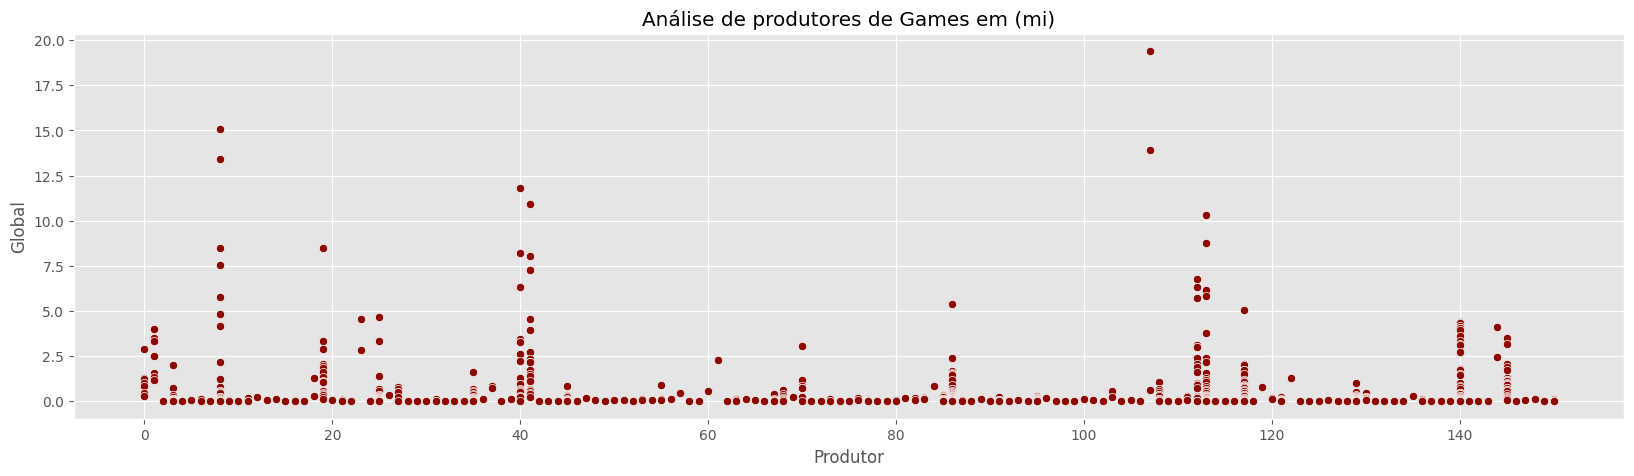

In [20]:
plt.figure(figsize=(20,5))
plt.title('Análise de produtores de Games em (mi)')
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[2]);

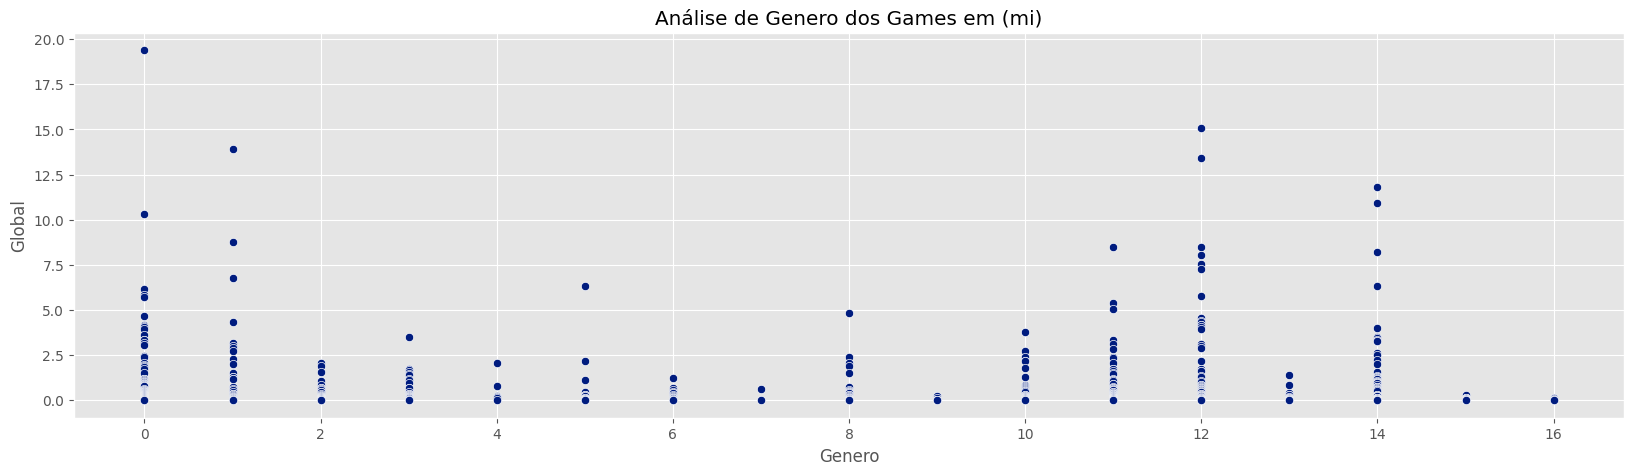

In [21]:
plt.figure(figsize=(20,5))
plt.title('Análise de Genero dos Games em (mi)')
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[0]);

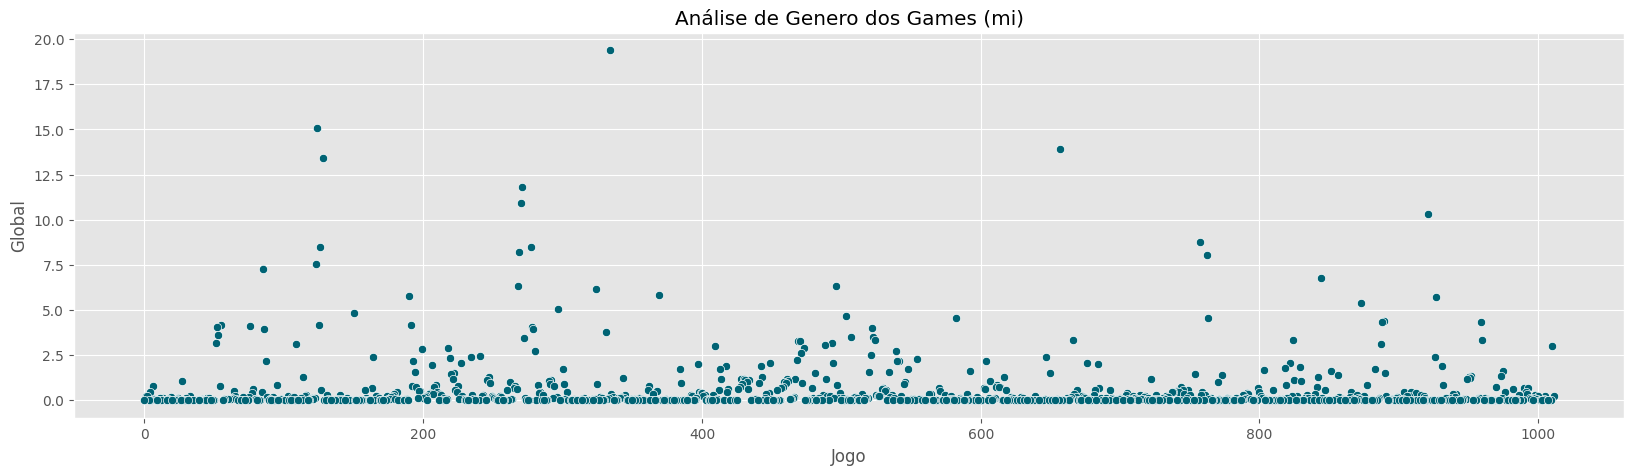

In [22]:
plt.figure(figsize=(20,5))
plt.title('Análise de Genero dos Games (mi)')
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[5]);

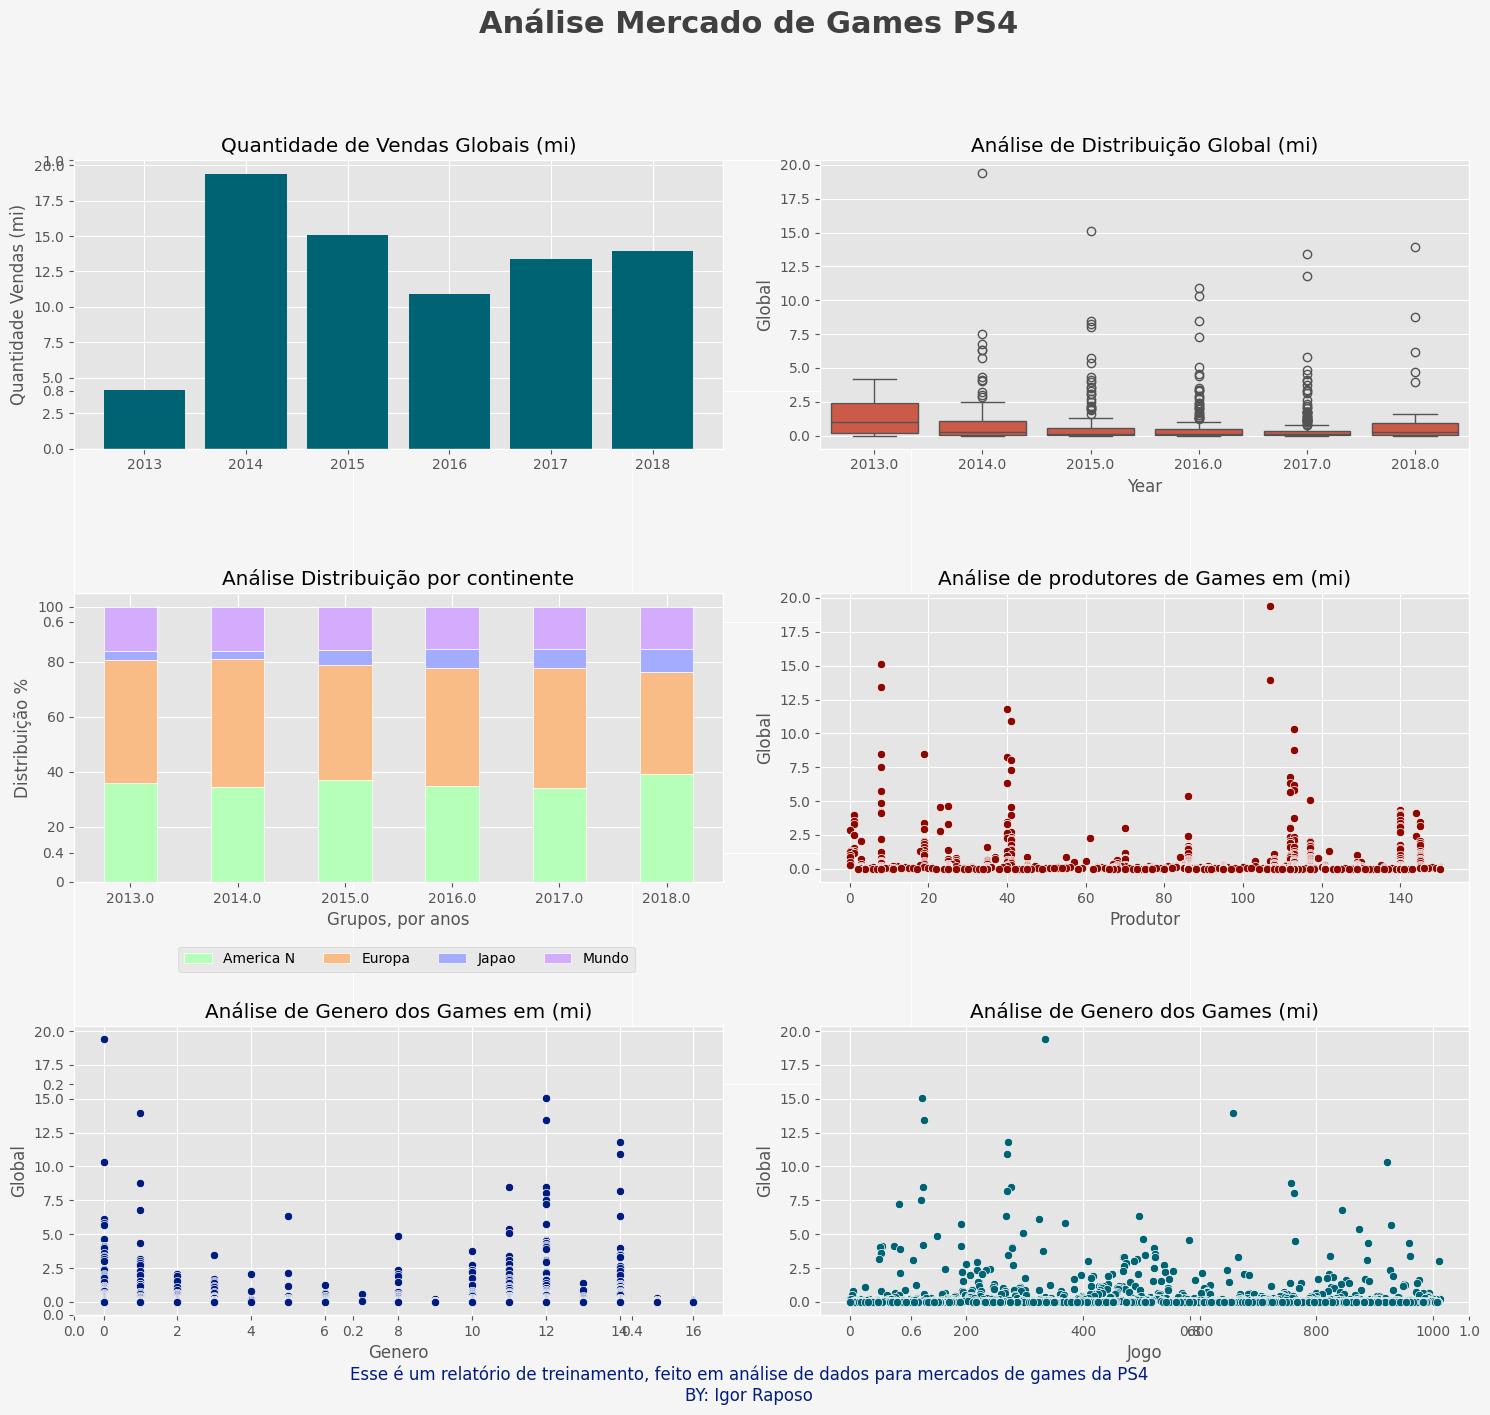

In [23]:
# Relatório com varios graficos
fig, ax = plt.subplots(figsize=(18, 15))

# Parametros para o grid
linhas = 3
colunas = 2
# cor de fundo
cor_fundo = '#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos graficos
plt.style.use('ggplot')

# Titulo para os graficos
plt.suptitle('Análise Mercado de Games PS4', fontsize= 22, color='#404040', fontweight=600)


# Acessando grafico 1
plt.subplot(linhas, colunas, 1)
plt.title('Quantidade de Vendas Globais (mi)')
plt.bar(base_dados['Year'], base_dados['Global'], color=paleta_cores[5])
plt.ylabel('Quantidade Vendas (mi)')


# Acessando grafico 2
plt.subplot(linhas, colunas, 2)
plt.title('Análise de Distribuição Global (mi)')
sns.boxplot(data=base_dados, x='Year', y='Global')


# Acessando grafico 3
plt.subplot(linhas, colunas, 3)
Grupos = [0, 1, 2, 3, 4, 5]
plt.title('Análise Distribuição por continente')
plt.bar(Grupos, America, width=largura_barra, color='#b5ffb9', edgecolor='white')
plt.bar(Grupos, Europa, bottom=America, width=largura_barra, color='#f9bc86', edgecolor='white')
plt.bar(Grupos, Japao, bottom=[A + B for A, B in zip(America, Europa)], width=largura_barra, color='#a3acff', edgecolor='white')
plt.bar(Grupos, Mundo, bottom=[A + B + C for A, B, C in zip(America, Europa, Japao)], width=largura_barra, color='#d3acfe', edgecolor='white')
plt.xticks(Grupos, Rotulos);
plt.xlabel('Grupos, por anos')
plt.ylabel('Distribuição %')
plt.legend(['America N', 'Europa', 'Japao', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.2), ncol=4)


# Acessando grafico 4
plt.subplot(linhas, colunas, 4)
plt.title('Análise de produtores de Games em (mi)')
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[2])

# Acessando grafico 5
plt.subplot(linhas, colunas, 5)
plt.title('Análise de Genero dos Games em (mi)')
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[0])

# Acessando grafico 6
plt.subplot(linhas, colunas, 6);
plt.title('Análise de Genero dos Games (mi)')
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[5])

# Ajustar o layout para que o grafico n fique um dsobre o outro
plt.subplots_adjust(hspace=0.50, wspace=0.15)

# Rpdapé
rodape = '''
Esse é um relatório de treinamento, feito em análise de dados para mercados de games da PS4
BY: Igor Raposo'''

# Incluindo rodapé no relatório
fig.text(0.5, 0.05, rodape, ha='center', va='bottom', size=12, color=paleta_cores[0]);